
## Assignment List (80 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Transform and plot image. (15 points)
2. Data loading. (10 points)
3. Train the baseline model and plot the learning curve. (15 points)

4. Comparison and analysis (20 points)
    * Compare the training results of 5, 20, and 50 epochs.
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 
    * Try a different data_transform function 
5. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results? (10 points)
6. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction. (10 points)
    * Does the model you trained get it right? 
    * If not, what do you think you could do to improve it?
    
## Advanced options (20 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
- A1: Train a complicated model on the dataset (ResNet18) (10 points) \
    **Remenber to resize the image data and recall dataloader**.
- A2: Compare the performance of a simple model (provided by the template) and the complicated model. (5 points)
      Plot learning curves in the same figure axes
- A3: Usage of git version control (5 points)
      Git add, git commit, git log, insert a screenshot within this notebook

### Deadline: 11.59 pm 16/01/2023
### Submit a rar/zip folder to brightspace under the unit of **Machine Learning for Media Production**


## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.__version__, device


('1.12.1+cu102', 'cuda')

## 1. Get data
[Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).
In this assignment, only 3 classes are used to form a small classification dataset, it contains pizza, steak and sushi.
And instead of 1,000 images per class, ervey image class only has 100 images(10%).


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lizhiqihhh/AIM-MLWorkshop/raw/main/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [3]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Task 1

1. Transform training dataset and testing dataset.
2. Plot images 


## 1.1 Transforming data


In [4]:
# import libraries and packages
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [5]:
# Write transform for image
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                     transforms.Resize([64,64]),
                                     transforms.ToTensor(),
    # Step 1: Resize the images to 64x64
    # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
    
    # Step 2: Turn the image into a torch.Tensor
    # converts all pixel values from 0-255 to be between 0-1  
    
    # Step 3: RandomHorizontalFlip---Flip the images randomly on the horizontal p = probability of flip, 0.5 = 50% chance 
    
    ])

In [6]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # root should be the target folder of images
                                  transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                              transforms.Resize([64,64]),
                                                            transforms.ToTensor()]), 
                                  # transform should be a set of transform functions to perform on images
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, # it should be the folder of test data 
                                 transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                              transforms.Resize([64,64]),
                                                            transforms.ToTensor()])
                                )
                                 # same with transform applied to train_data

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [7]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                              transforms.Resize([64,64]),
                                                            transforms.ToTensor()]), 
                                  target_transform=None) 

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=transforms.Compose([transforms.RandomHorizontalFlip(),
                                                              transforms.Resize([64,64]),
                                                            transforms.ToTensor()])
                                )
                                 
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [8]:
len(train_data), len(test_data)

(225, 75)

## 1.2 Plot the transformed image
`Plot_imgs` and `plot_transformed_images` are defined in plot.py, complete the contents in plot.py 

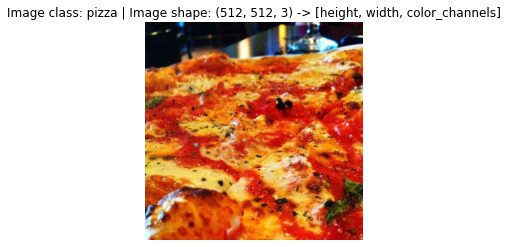

In [9]:
from pathlib import Path
from plot import Plot_imgs
# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Plot an image using matplotlib
# Please complete the plot.py before use this plotting function
Plot_imgs(image_path)

In [10]:
# Get class names as a list
class_names = train_data.classes
# Try index on the `train_data` and `test_data` `Dataset`'s to find samples and their target labels.
img, label = train_data[0][0], train_data[0][1]


In [11]:
# Print the shape/content/datatype of img and label
y=test_data
x=train_data
datastype=train_data.class_to_idx
print(class_names)
print(datastype)
train_data.targets,train_data

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

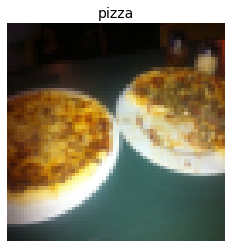

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


# ---------------Plot the permuted image-------------
plt.figure()
plt.imshow(img_permute)
# ---------------End of code------------------------
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 1.3 Turn loaded images into `DataLoader`'s

## Task 2: Turn train and test Datasets into DataLoaders (10 points)

In [13]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,shuffle=True) # shuffle training data

test_dataloader = DataLoader(test_data) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd5c36695b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd5c3669b20>)

In [14]:
# Load a batch of images in the training dataset
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


`display_random_images` is defined in plot.py, please complete the contents in `plot.py`

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


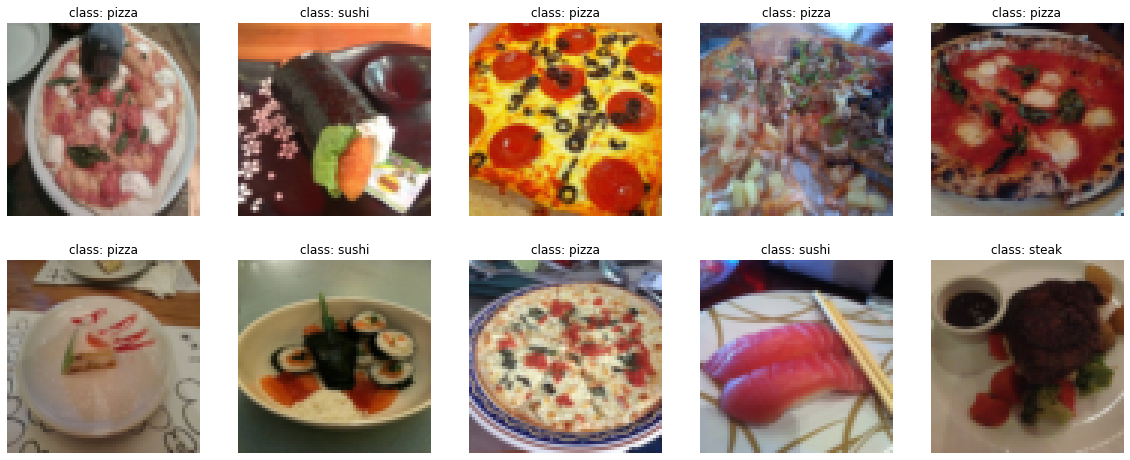

In [15]:
# Display random images from Dataset
from plot import display_random_images
display_random_images(train_data, 
                      n=12, 
                      classes=class_names,
                      seed=None)

## Task 3 Model_0 training
### Task 3.1 Train the baseline model TinyVGG


In [16]:
from TinyVGG import TinyVGG # import the model from TinyVGG.py
torch.manual_seed(42)

# --------------Initialize the TinyVGG model--------------
'''
    Parameters: input_shape
                hidden_units
                output_shape
'''
model_0 = TinyVGG(3,10,3).to(device) 
# -------------------  End of code -----------------------

model_0 # Print the model info here!

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [17]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0213,  0.0190, -0.0162]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3377, 0.3370, 0.3253]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
0


In [18]:
# Load the training function from TinyVGG.py
from TinyVGG import train
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_0 --------------------------
# Fill in the parentheses with parameters needed in the train function
model_0_results = train(model_0,train_dataloader,test_dataloader,optimizer,loss_fn)
# -------------------------  End of code  --------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1051 | train_acc: 0.2978 | test_loss: 1.0958 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3200 | test_loss: 1.0972 | test_acc: 0.4133
Epoch: 3 | train_loss: 1.1004 | train_acc: 0.2444 | test_loss: 1.0979 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.1004 | train_acc: 0.3156 | test_loss: 1.0985 | test_acc: 0.3333
Total training time: 9.114 seconds


### Task 3.2: Plot the loss curves of Model_0

From the print outs of our `model_0` training, it didn't look like it did too well.

Create a function to plot the values in the `model_0_results` dictionary.

In [19]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    train_loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    train_accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # --------------- Complete the following lines --------------
    # Plot loss, please include label, title, and legend in the figure
    plt.subplot(1, 2, 1)
    plt.plot(epochs,train_loss,label='train_loss')   # plot epochs, train_loss
    plt.plot(epochs,test_loss,label='test_loss')   # plot epochs, test_loss
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs,train_accuracy,label='train_accuracy') # plot epochs, train_accuracy, add label
    plt.plot(epochs,test_accuracy,label='test_accuracy') # plot epochs, test_accuracy, add label
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    # ---------------------- End of codes -----------------------

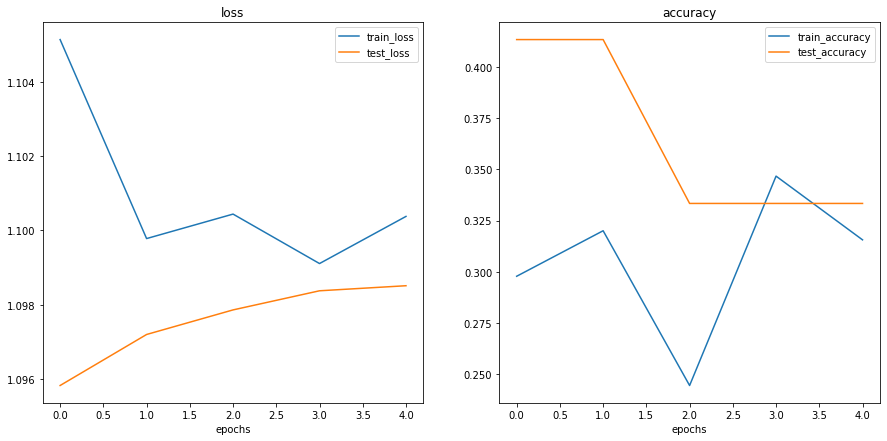

In [20]:
plot_loss_curves(model_0_results)

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.


In [21]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Task 4: Comparison and analysis


### Task 4.1 Try different epochs


In [22]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# create a new instance of TinyVGG model
model_e_5 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_5.parameters(), lr=0.001)

model_e_5_results = train(model_e_5,train_dataloader,test_dataloader,optimizer,loss_fn,5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1033 | train_acc: 0.2889 | test_loss: 1.0957 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3022 | test_loss: 1.0968 | test_acc: 0.4133
Epoch: 3 | train_loss: 1.0998 | train_acc: 0.3200 | test_loss: 1.0977 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0993 | train_acc: 0.3200 | test_loss: 1.0978 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.0985 | test_acc: 0.3333


In [23]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_20 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_20.parameters(), lr=0.0001)

model_e_20_results = train(model_e_20,train_dataloader,test_dataloader,optimizer,loss_fn,20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1000 | train_acc: 0.2667 | test_loss: 1.1026 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0997 | train_acc: 0.3244 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0961 | train_acc: 0.3911 | test_loss: 1.0972 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0797 | train_acc: 0.4000 | test_loss: 1.0760 | test_acc: 0.3467
Epoch: 11 | train_loss: 0.9702 | train_acc: 0.5378 | test_loss: 1.0342 | test_acc: 0.4000
Epoch: 12 | train_l

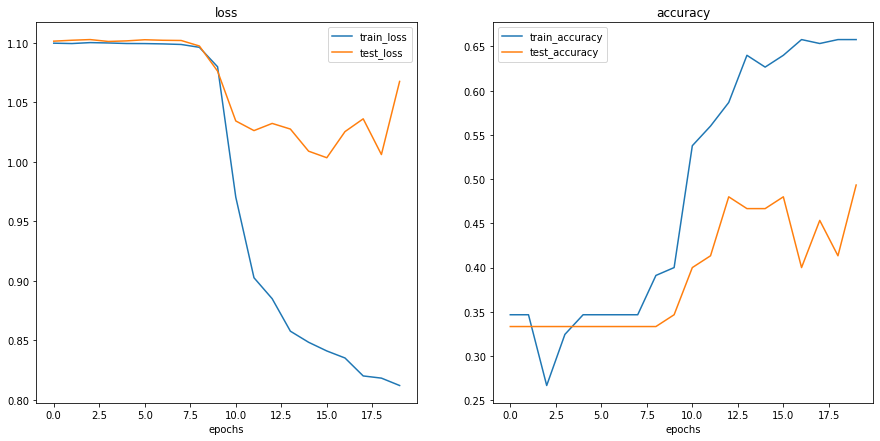

In [24]:
plot_loss_curves(model_e_20_results)

In [25]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_50 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_50.parameters(), lr=0.0001)

model_e_50_results = train(model_e_50,train_dataloader,test_dataloader,optimizer,loss_fn,50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1000 | train_acc: 0.2667 | test_loss: 1.1025 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0997 | train_acc: 0.3244 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0993 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0986 | train_acc: 0.3422 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0981 | train_acc: 0.3467 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0936 | train_acc: 0.3600 | test_loss: 1.0901 | test_acc: 0.4133
Epoch: 12 | train_l

KeyboardInterrupt: 

In [26]:
plot_loss_curves(model_e_50_results)

NameError: name 'model_e_50_results' is not defined

### Compare: Print the differences

In [27]:
import pandas as pd 
model_compare_1 = pd.DataFrame(model_e_5_results)
model_compare_2 = pd.DataFrame(model_e_20_results)
model_compare_3 = pd.DataFrame(model_e_50_results)

model_compare_1

NameError: name 'model_e_50_results' is not defined

### Analysis: What you find and how to improve model_0's performance?

**Your answer**:
If the epoch times are too small, it will become very inaccurate and easy to cause gradient loss. It will stop at a local lowest point.



### Task 4.2 Try different data transform functions

In [28]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# --------- Create training transform with TrivialAugment ---------
from torchvision.transforms import ToTensor
# TrivialAugment: Tuning-Free Yet State-of-the-Art Data Augmentation (source:https://arxiv.org/abs/2103.10158)
train_transform_trivial_augment = transforms.Compose([
    
    # Resize
    transforms.Resize([64,64]),
    # RandomHorizontalFlip
    transforms.RandomHorizontalFlip(),
    # TrivialAugment
    transforms.TrivialAugmentWide(fill=20),
    # ToTensor
    transforms.ToTensor()
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)

train_dataloader_augmented = DataLoader(train_data)
test_dataloader_simple = DataLoader(test_data)
# ---------------------- End of code ----------------------

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd5c30e6520>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd5c3669b20>)

In [29]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(3,10,3).to(device)
model_1 # print model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [30]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.00001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_1 ----------------------------
# Fill in the parentheses with parameters needed in the train function
model_1_results = train(model_1,train_dataloader,test_dataloader,optimizer,loss_fn)
# ------------------------- End of model_1 ---------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0985 | train_acc: 0.3156 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0984 | train_acc: 0.3289 | test_loss: 1.1016 | test_acc: 0.3333
Total training time: 8.969 seconds


## Task 5: Double the number of hidden units in your model and train it for 20 epochs

In [31]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(3,20,3).to(device) # use 20 hidden units instead of 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.0001)

model_2_results = train(model_2,train_dataloader,test_dataloader,optimizer,loss_fn,50) # train for 20 epochs

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1003 | train_acc: 0.2978 | test_loss: 1.0963 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.3378 | test_loss: 1.0978 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0963 | train_acc: 0.3422 | test_loss: 1.0891 | test_acc: 0.3867
Epoch: 4 | train_loss: 1.0546 | train_acc: 0.4711 | test_loss: 1.1135 | test_acc: 0.3467
Epoch: 5 | train_loss: 0.9313 | train_acc: 0.5644 | test_loss: 1.0264 | test_acc: 0.4133


KeyboardInterrupt: 

In [32]:
plot_loss_curves(model_2_results)

NameError: name 'model_2_results' is not defined

## Task 6: Make prediction on a custom image based on model_2


In [33]:
# Read a custom image from img_path and represent it as a tensor datatype
import torchvision

img_path = './data/'
custom_image = img_path + "1img.jpeg"
img = torchvision.io.read_image(custom_image)


Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

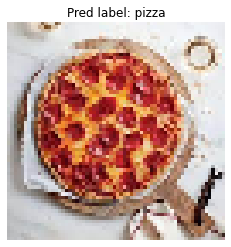

In [34]:
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize([64,64])
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0).to(device) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     


Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

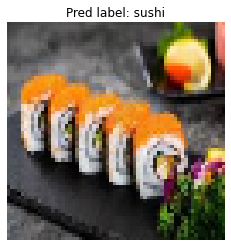

In [35]:
img_path = './data/'
custom_image = img_path + "2img.jpeg"
img = torchvision.io.read_image(custom_image)
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize([64,64])
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0).to(device) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     

Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

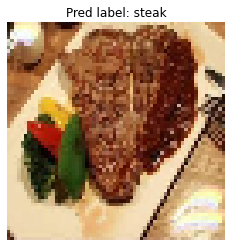

In [36]:
img_path = './data/'
custom_image = img_path + "3img.jpeg"
img = torchvision.io.read_image(custom_image)
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize([64,64])
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0).to(device) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     

### Analysis
Does the model you trained get it right?
If not, how to improve it?\
**Your answer:**

In [ ]:
Right, but sometimes things go wrong. You can increase epochs to improve the accuracy of training. 
If the learning rate is not so correct, you can obtain relatively objective results by increasing the number of Epochs.



## Advanced tasks
### A1: Train a complicated model (Use ResNet18 as an example) (10 points)

### Read `Resnet18_pytorch.py` and complete the model file
> If you finish `Resnet18_pytorch.py` correctly, run the following line will generate a vector with shape = ([1,3])

In [37]:
%%bash
python3.9 Resnet18_pytorch.py

torch.Size([1, 3])Output feature size.


In [73]:
from Resnet18_pytorch import ResNet, BasicBlock
torch.manual_seed(42)
model_resnet = ResNet(img_channels=3, num_layers=18, block=BasicBlock, num_classes=3).to(device)
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Preparing train dataloader and test dataloader


In [74]:
BATCH_SIZE=32
NUM_WORKERS=2
# ----- Complete the following transform functions -----
train_transform_augment = transforms.Compose([
   
])
#  ----------------  End of code --------------------
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augment)
train_dataloader_resnet = DataLoader(...)

test_dataloader_simple = DataLoader(...)

train_dataloader_resnet, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd580c35310>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd5c3669b20>)

#### Start training

In [75]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochsImage by Boyuan Cheng (s5526309)
￼
￼
￼
￼
Boyuan Cheng (s5526309)18:09
￼
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet.parameters(), lr=0.0001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_resnet_results = train(model_resnet,train_dataloader,test_dataloader,optimizer,loss_fn)
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0735 | train_acc: 0.4222 | test_loss: 1.1186 | test_acc: 0.4133
Epoch: 2 | train_loss: 0.8958 | train_acc: 0.5822 | test_loss: 0.9887 | test_acc: 0.4800
Epoch: 3 | train_loss: 0.6973 | train_acc: 0.6889 | test_loss: 0.9905 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.5148 | train_acc: 0.7778 | test_loss: 1.1150 | test_acc: 0.4267
Epoch: 5 | train_loss: 0.4665 | train_acc: 0.8222 | test_loss: 1.0288 | test_acc: 0.4933
Total training time: 20.107 seconds


### A2: Compare model performance (5 points)
Choose a previous model used in **Task 3** (model_0) or **Task 4** (model_1) to compare with ResNet18 model

In [76]:
from torchinfo import summary
summary(model_resnet, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 3]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

### Plot the train_loss and test_loss of model_resnet and a previous model using subplot function

In [77]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results) # Or model_1

model_resnet_df = pd.DataFrame(model_resnet_results)
model_0_df, model_resnet_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.105135   0.297778   1.095823  0.413333
 1    1.099779   0.320000   1.097197  0.413333
 2    1.100438   0.244444   1.097858  0.333333
 3    1.099106   0.346667   1.098373  0.333333
 4    1.100375   0.315556   1.098509  0.333333,
    train_loss  train_acc  test_loss  test_acc
 0    1.073519   0.422222   1.118603  0.413333
 1    0.895751   0.582222   0.988650  0.480000
 2    0.697273   0.688889   0.990534  0.466667
 3    0.514835   0.777778   1.114993  0.426667
 4    0.466498   0.822222   1.028774  0.493333)

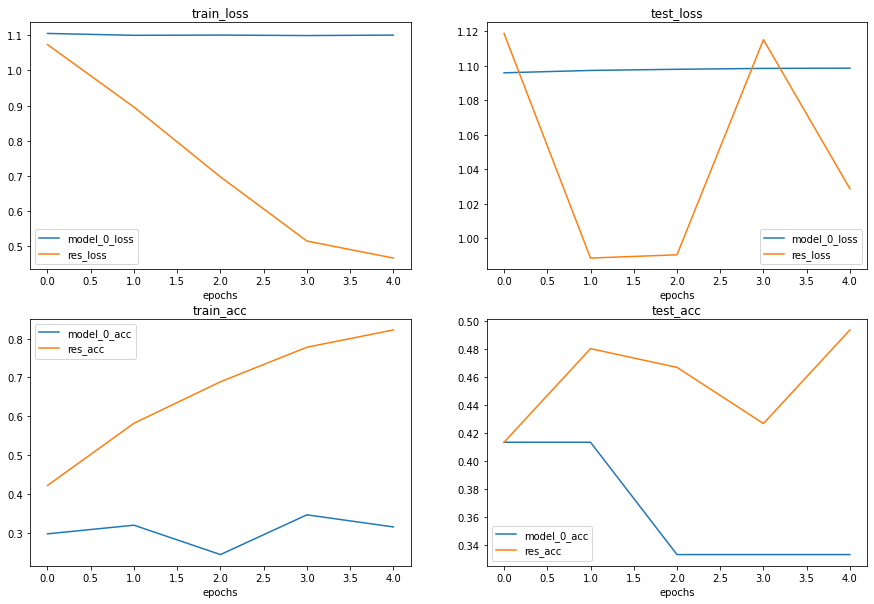

In [78]:
# ------ Complete subplot functions in the following lines -------
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss with label, title, legend
plt.subplot(2, 2, 1)
plt.plot(epochs,model_0_df['train_loss'],label='model_0_loss')
plt.plot(epochs,model_resnet_df['train_loss'],label='res_loss')  
plt.title('train_loss')
plt.xlabel('epochs')
plt.legend()




# Plot test loss
plt.subplot(2, 2, 2)

plt.plot(epochs,model_0_df['test_loss'],label='model_0_loss')  
plt.plot(epochs,model_resnet_df['test_loss'],label='res_loss')  
plt.title('test_loss')
plt.xlabel('epochs')
plt.legend()




# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs,model_0_df['train_acc'],label='model_0_acc') 
plt.plot(epochs,model_resnet_df['train_acc'],label='res_acc')  
plt.title('train_acc')
plt.xlabel('epochs')
plt.legend()
 





# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs,model_0_df['test_acc'],label='model_0_acc')   
plt.plot(epochs,model_resnet_df['test_acc'],label='res_acc')  
plt.title('test_acc')
plt.xlabel('epochs')
plt.legend()





### A3: Git version control (5 points)
Please insert an image in the cell to show your git log

### Git version control advices
1. Create a remote repo, upload this notebote to the repo\
   **Take a screenshot of the inital status**
2. git clone (ssh link of the repo)
3. Make some modifications to the files
4. git add .
5. git commit -m "leave some message here"
6. git push
7. git log
8. check the remote repo, **Take a screenshot after git push operations**

In [1]:
from IPython.display import Image
Image("./git-staging-workflow.png",width=900,height=500)

FileNotFoundError: No such file or directory: './git-staging-workflow.png'

FileNotFoundError: No such file or directory: './git-staging-workflow.png'

<IPython.core.display.Image object>

In [ ]:
Image("git pull.png",width=994,height=655)

In [ ]:
Image("git merge.png")

In [ ]:
Image("git push steps.png")

In [ ]:
Image("before.png")

In [ ]:
Image("after.png")

In [ ]:
Image("gitlog.png")